TARGET: nota ciencias da natureza (NU_NOTA_CN)

FUTEURE: 
Situação de conclusão do Ensino Médio (TP_ST_CONCLUSAO);
Tipo de escola do Ensino Médio (TP_ESCOLA);
Qual é a renda mensal de sua família (Q006);
Na sua residência tem acesso à Internet? (Q025); 
Incluindo você, quantas pessoas moram atualmente em sua residência? (Q005); 
Localização da Escola (TP_LOCALIZACAO_ESC)

# Projeto 3 - CDADOS

# Membros: 
Augusto Ricardo Ferreira, Matheus Pereira Belarmino 

# Introdução e mineração de dados


**Variável Alvo (Target):**

- Nota em Ciências da Natureza (NU_NOTA_CN)

**Variáveis Explicativas (Features)**

- Situação de Conclusão do Ensino Médio (TP_ST_CONCLUSAO)
- Tipo de Escola do Ensino Médio (TP_ESCOLA)
- Renda Mensal da Família (Q006)
- Acesso à Internet na Residência (Q025)
- Número de Pessoas na Residência (Q005)
- Localização da Escola (TP_LOCALIZACAO_ESC)


**Questão a ser respondida:**
Levando em consideração variáveis socioeconômicas, como a nota do Enem se altera para pessoas de diferentes classes sociais?




 As variáveis são classificadas em dois tipos principais: **features** e **target**. As **features** são as variáveis explicativas ou independentes, que ajudam a explicar ou prever a variável de interesse, enquanto o **target** é a variável dependente, que é o foco da nossa análise e previsão.

## Descrição das Variáveis

### Variável Alvo (Target):

- **NU_NOTA_CN (Nota em Ciências da Natureza)**
  - **Tipo:** Quantitativa 
  - **Descrição:** Nota obtida na prova de Ciências da Natureza

### Variáveis Explicativas (Features):

- **TP_ST_CONCLUSAO (Situação de Conclusão do Ensino Médio)**
  - **Tipo:** Qualitativa ordinal
  - **Descrição:** Status de conclusão do Ensino Médio

- **TP_ESCOLA (Tipo de Escola do Ensino Médio)**
  - **Tipo:** Qualitativa ordinal
  - **Descrição:** Tipo de escola (1: Pública, 2: Privada, etc.)

- **Q006 (Renda Mensal da Família)**
  - **Tipo:** Qualitativa ordinal
  - **Descrição:** Faixa de renda mensal familiar

- **Q025 (Acesso à Internet na Residência)**
  - **Tipo:** Qualitativa nominal
  - **Descrição:** Se há ou não acesso à internet na residência (A: Sim, B: Não)

- **TP_LOCALIZACAO_ESC (Localização da Escola)**
  - **Tipo:** Qualitativa nominal
  - **Descrição:** Localização da escola (1: Urbana, 2: Rural)

- **Q005 (Número de Pessoas na Residência)**
  - **Tipo:** Quantitativa discreta
  - **Descrição:** Quantas pessoas moram na residência


In [3]:
# carregando bibliotecas
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
c:\zTodoresto\Insper\Projeto_3_Cdados\P3\Projeto3


In [4]:
dados = pd.read_csv('c:\zTodoresto\Insper\Projeto_3_Cdados\P3\MICRODADOS_ENEM_2023.csv', sep = ';', encoding='ISO-8859-1', chunksize=1000)
#dados = pd.read_csv('C:/Users/matheus/Desktop/projeto2_24/microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv', sep = ';', encoding='ISO-8859-1', chunksize=1000)
dados = pd.concat(dados)

A partir dos dados originais, foi criado um novo dataframe com as colunas que nos interessam para a análise.

In [5]:
df_filtrado = dados[['NU_NOTA_CN','TP_ESCOLA','Q006','Q025','TP_LOCALIZACAO_ESC','Q005','TP_PRESENCA_CN','TP_ST_CONCLUSAO']]
df_filtrado.columns

Index(['NU_NOTA_CN', 'TP_ESCOLA', 'Q006', 'Q025', 'TP_LOCALIZACAO_ESC', 'Q005',
       'TP_PRESENCA_CN', 'TP_ST_CONCLUSAO'],
      dtype='object')

Aqui foi necessario filtrar o DataFrame para utilizar apenas os dados de alunos que compareceram.

In [6]:
df_filtrado = df_filtrado.loc[df_filtrado['TP_PRESENCA_CN'] == 1]



In [7]:
df_filtrado

,NU_NOTA_CN,TP_ESCOLA,Q006,Q025,TP_LOCALIZACAO_ESC,Q005,TP_PRESENCA_CN,TP_ST_CONCLUSAO
2,502.0,1,C,B,NaN,5,1,1
3,459.0,2,C,B,1.0,5,1,2
4,402.5,2,B,A,1.0,4,1,2
9,564.7,1,F,B,NaN,2,1,1
10,644.9,1,B,B,NaN,4,1,1
...,...,...,...,...,...,...,...,...
3933946,568.6,1,D,B,NaN,3,1,1
3933948,476.2,2,F,B,1.0,4,1,2
3933950,566.2,1,F,B,NaN,5,1,1
3933951,377.2,1,F,B,NaN,4,1,3


Nesta etapa é essencial transformar variáveis qualitativas em categorias categóricas. Isso simplifica a interpretação dos dados e melhora a capacidade dos modelos de predição em compreendê-los de forma mais eficaz.

In [8]:
# Converter as variáveis qualitativas para categóricas
df_filtrado['TP_ESCOLA'] = df_filtrado['TP_ESCOLA'].astype('category')
df_filtrado['Q006'] = df_filtrado['Q006'].astype('category')
df_filtrado['Q025'] = df_filtrado['Q025'].astype('category')
df_filtrado['TP_LOCALIZACAO_ESC'] = df_filtrado['TP_LOCALIZACAO_ESC'].astype('category')


In [9]:
df_filtrado['NU_NOTA_CN'].describe()

count    2.692427e+06
mean     4.957515e+02
std      8.792872e+01
min      0.000000e+00
25%      4.405000e+02
50%      4.939000e+02
75%      5.512000e+02
max      8.684000e+02
Name: NU_NOTA_CN, dtype: float64

A função .describe fornece diversas informações detalhadas sobre as notas de Ciências da Natureza, permitindo uma análise abrangente dos dados:

- Contagem: 2.692.427 estudantes participaram.
- Média: A nota média foi de 495,75.
- Desvio Padrão: O desvio padrão é de aproximadamente 879,08, indicando uma grande variação nas notas.
- Mínimo: A nota mínima registrada é 0, o que pode indicar que alguns alunos faltaram ou zeraram a prova.
- 1º Quartil (25%): 25% dos estudantes tiveram notas abaixo de 440.
- Mediana (50%): A nota mediana é 493, o que significa que metade dos estudantes tirou menos que isso e a outra metade mais.
- 3º Quartil (75%): 75% dos estudantes tiveram notas abaixo de 551.
- Máximo: A nota máxima foi 869,4.

Esses dados permitem uma compreensão detalhada da distribuição das notas e ajudam a identificar padrões e variações de desempenho entre os estudantes.

# Análise da distribuição de notas de Ciências da Natureza 

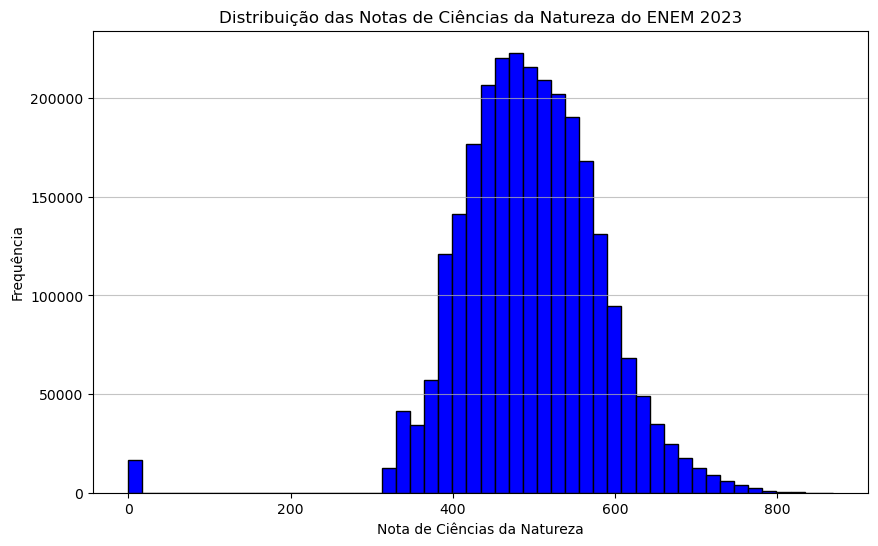

In [10]:

plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['NU_NOTA_CN'], bins=50, color='blue', edgecolor='black')
plt.title('Distribuição das Notas de Ciências da Natureza do ENEM 2023')
plt.xlabel('Nota de Ciências da Natureza')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Distribuição das Notas:**

- A maior concentração de notas está na faixa de 400 a 600 pontos.
- A distribuição das notas parece ter uma forma aproximadamente normal, com uma leve assimetria à esquerda.

**Outliers e Notas Baixas:**

- Há um pico significativo em torno de 0 pontos, indicando que muitos alunos obtiveram uma nota extremamente baixa ou nula.
- Este pico pode ser causado por alunos que não responderam à prova, responderam incorretamente ou outras razões específicas para notas nulas.

**Notas Altas:**

- A frequência de notas acima de 700 pontos é muito baixa, indicando que poucos alunos alcançam notas muito altas em Ciências da Natureza.

**Frequência:**

- A maioria dos alunos obteve notas entre 400 e 600 pontos, com o pico mais alto de frequência próximo de 500 pontos.


## Análise da Variável (NU_NOTA_CN) vs. TP_ESCOLA


C:\Users\gutor\AppData\Local\Temp\ipykernel_45356\301041387.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df_filtrado['TP_ESCOLA'].cat.rename_categories({1: 'Não Respondeu', 2: 'Escola Pública', 3: 'Escola Privada'}, inplace=True)


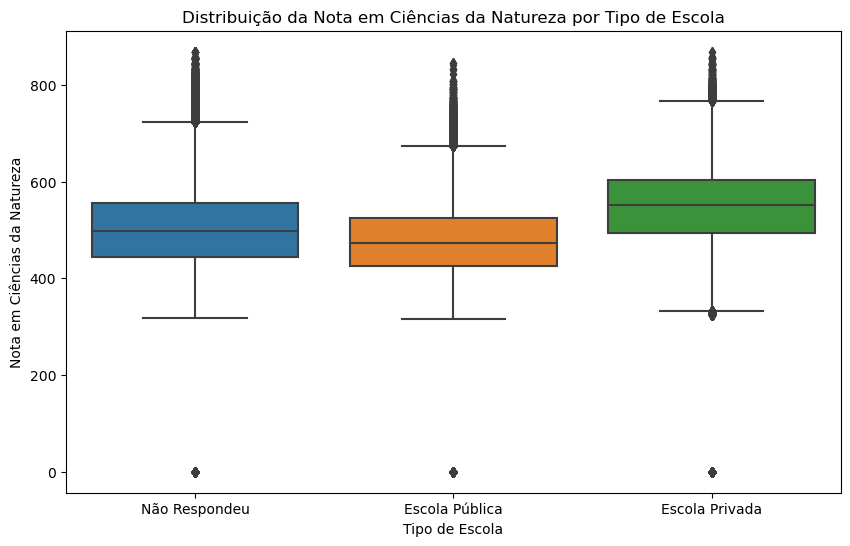

In [11]:
df_filtrado['TP_ESCOLA'].cat.rename_categories({1: 'Não Respondeu', 2: 'Escola Pública', 3: 'Escola Privada'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_CN', data=df_filtrado)
plt.title('Distribuição da Nota em Ciências da Natureza por Tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota em Ciências da Natureza')
plt.show()

**Interpretação**

**Distribuição das Notas por Tipo de Escola:**

- **Tipo de Escola 1:** Tem uma mediana mais alta comparada com o Tipo de Escola 2, e possui uma maior variação de notas.
- **Tipo de Escola 2:** Apresenta a menor mediana e uma distribuição mais concentrada em notas mais baixas.
- **Tipo de Escola 3:** Tem a maior mediana, indicando que os alunos desse tipo de escola tendem a ter notas mais altas em Ciências da Natureza.

**Dispersão das Notas:**

Todas as categorias de escola apresentam outliers, com alguns alunos obtendo notas excepcionalmente altas ou baixas.


<Figure size 1400x600 with 0 Axes>

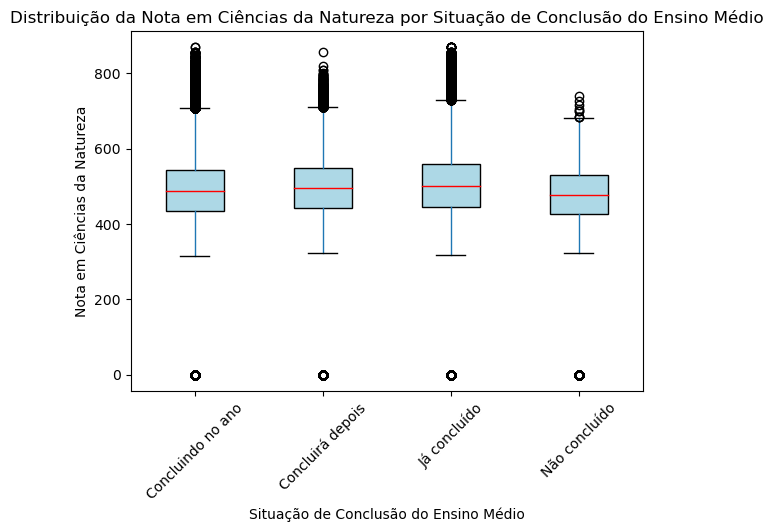

In [12]:
conclusao_labels = {
    1: 'Já concluído',
    2: 'Concluindo no ano',
    3: 'Concluirá depois',
    4: 'Não concluído'
}
df_filtrado['TP_ST_CONCLUSAO'] = df_filtrado['TP_ST_CONCLUSAO'].map(conclusao_labels)

# Criar o boxplot com matplotlib
plt.figure(figsize=(14, 6))
df_filtrado.boxplot(column='NU_NOTA_CN', by='TP_ST_CONCLUSAO', grid=False, patch_artist=True, 
                 boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Distribuição da Nota em Ciências da Natureza por Situação de Conclusão do Ensino Médio')
plt.suptitle('')  # Remove o título automático gerado por pandas
plt.xlabel('Situação de Conclusão do Ensino Médio')
plt.ylabel('Nota em Ciências da Natureza')
plt.xticks(rotation=45)
plt.show()

# Análise entre as notas de escolas rurais e urbanas

C:\Users\gutor\AppData\Local\Temp\ipykernel_45356\1058465271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TP_LOCALIZACAO_ESC'] = df_clean['TP_LOCALIZACAO_ESC'].map(localizacao_labels)


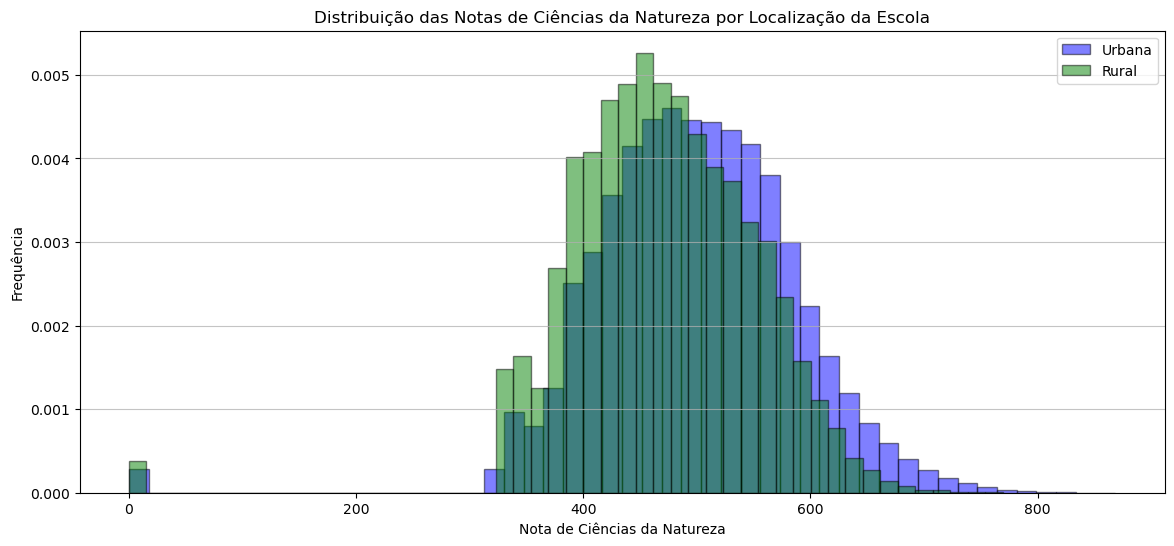

In [13]:

localizacao_labels = {
    1: 'Urbana',
    2: 'Rural'
}
df_clean = df_filtrado.dropna(subset=['NU_NOTA_CN', 'TP_LOCALIZACAO_ESC'])
df_clean['TP_LOCALIZACAO_ESC'] = df_clean['TP_LOCALIZACAO_ESC'].map(localizacao_labels)


plt.figure(figsize=(14, 6))

# Histograma para escolas urbanas
plt.hist(df_clean[df_clean['TP_LOCALIZACAO_ESC'] == 'Urbana']['NU_NOTA_CN'], bins=50, alpha=0.5, label='Urbana', color='blue', edgecolor='black',density= True)

plt.hist(df_clean[df_clean['TP_LOCALIZACAO_ESC'] == 'Rural']['NU_NOTA_CN'], bins=50, alpha=0.5, label='Rural', color='green', edgecolor='black', density= True)

plt.title('Distribuição das Notas de Ciências da Natureza por Localização da Escola')
plt.xlabel('Nota de Ciências da Natureza')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


# refazer analise
**Distribuição das Notas:**

- **Escolas Urbanas:** A distribuição das notas para escolas urbanas é muito mais abrangente, com um pico na faixa de 400 a 600 pontos. Isso indica que a maioria dos alunos de escolas urbanas está concentrada nesse intervalo.
- **Escolas Rurais:** A distribuição das notas para escolas rurais é significativamente menor em termos de frequência. Ainda assim, os alunos também se concentram principalmente na faixa de 400 a 600 pontos.

**Frequência:**

- A frequência de alunos que obtiveram notas nas escolas urbanas é muito maior em comparação com as escolas rurais. Isso pode ser devido ao maior número de escolas ou alunos em áreas urbanas.

**Notas Extremamente Baixas:**

- Notamos um pequeno pico em torno de 0 pontos, principalmente em escolas urbanas. Esses podem ser alunos que não responderam às questões ou tiveram desempenho muito ruim, ja que os alunos que não realizaram a prova foram tirados da análise.

**Comparação das Distribuições:**

- Ambas as distribuições seguem uma forma aproximadamente normal, com uma leve assimetria à esquerda.
- A maior densidade de alunos com notas na faixa de 400 a 600 pontos é visível em ambas as categorias, mas é muito mais acentuada nas escolas urbanas.

**Sugestões de Análises Adicionais:**

- **Análise de Outliers:** Investigar os motivos para as notas extremamente baixas ou nulas, especialmente na faixa de 0 pontos.
- **Análise Demográfica:** Analisar como outros fatores demográficos (renda familiar, escolaridade dos pais, etc.) influenciam as notas nas diferentes localizações.
- **Comparação com Outras Disciplinas:** Comparar as distribuições das notas de Ciências da Natureza com outras disciplinas para ver se as tendências se mantêm.


## Análise Ampla de um Heatmap - Notas de Ciências da Natureza por Renda Mensal Familiar (Q006) e Moradores por Casa (Q005)


C:\Users\gutor\AppData\Local\Temp\ipykernel_45356\2606777672.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Q006_label'] = df_clean['Q006'].map(category_mapping)


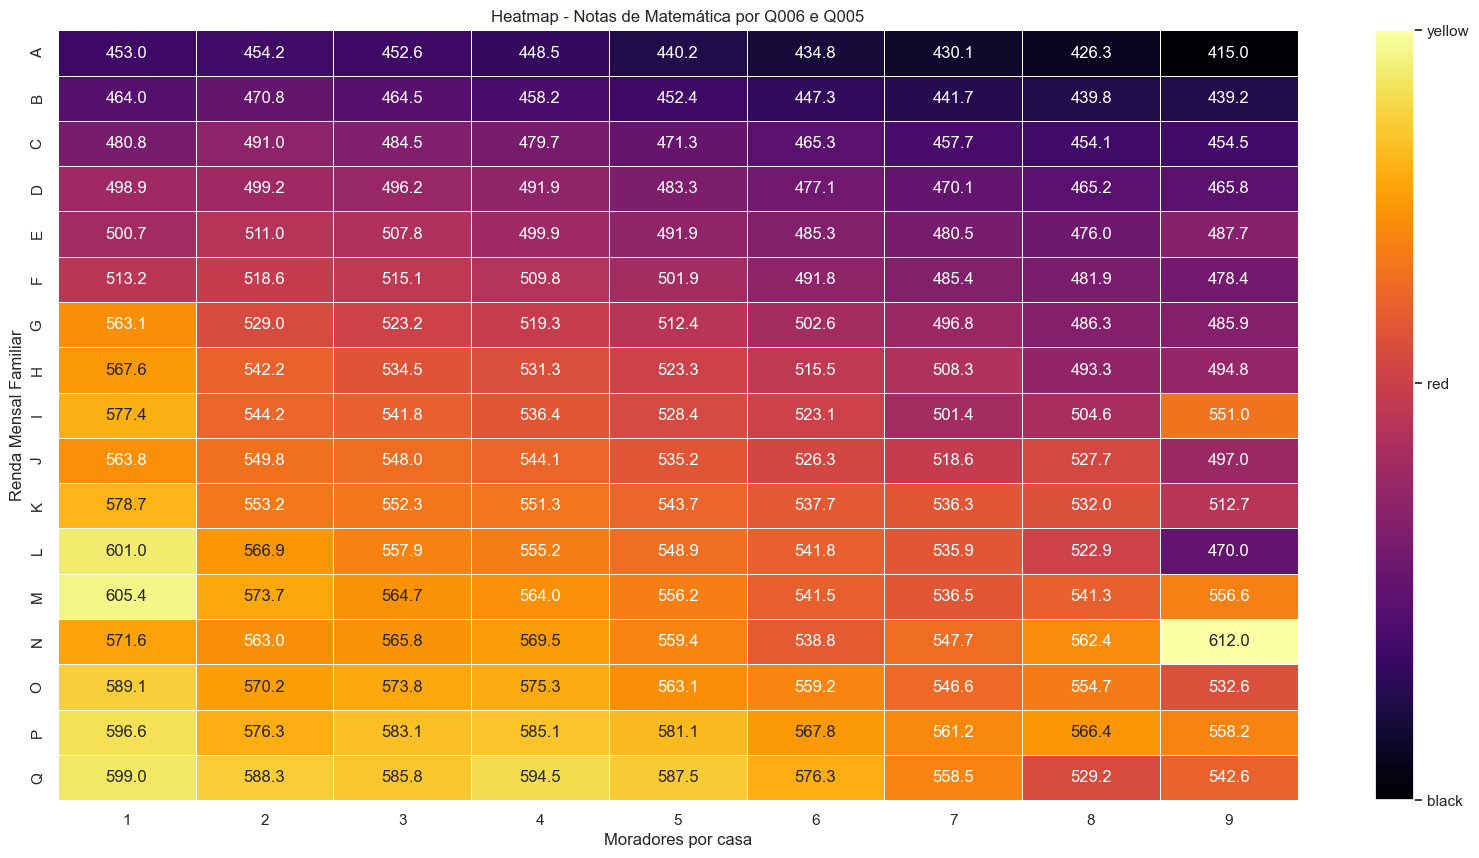

In [14]:
category_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.212,00',
    'C': 'De R$ 1.212,01 - R$ 1.818,00',
    'D': 'De R$ 1.818,01 - R$ 2.424,00',
    'E': 'De R$ 2.424,01 - R$ 3.030,00',
    'F': 'De R$ 3.030,01 - R$ 3.636,00',
    'G': 'De R$ 3.636,01 - R$ 4.848,00',
    'H': 'De R$ 4.848,01 - R$ 6.060,00',
    'I': 'De R$ 6.060,01 - R$ 7.272,00',
    'J': 'De R$ 7.272,01 - R$ 8.484,00',
    'K': 'De R$ 8.484,01 - R$ 9.696,00',
    'L': 'De R$ 9.696,01 - R$ 10.908,00',
    'M': 'De R$ 10.908,01 - R$ 12.120,00',
    'N': 'De R$ 12.120,01 - R$ 14.544,00',
    'O': 'De R$ 14.544,01 - R$ 18.180,00',
    'P': 'De R$ 18.180,01 - R$ 24.240,00',
    'Q': 'Acima de R$ 24.240,00'
}
df_clean['Q006_label'] = df_clean['Q006'].map(category_mapping)
cores = ["black", "red", "yellow"]

sns.set(rc={'figure.figsize': (20, 10)})
def map_colors(value):
    if value < np.mean(heatmap_data.values):
        return cores[0] 
    elif value == np.mean(heatmap_data.values):
        return cores[1]  
    else:
        return cores[2]  

heatmap_data = df_clean[df_clean['Q005'] <= 9].pivot_table(index='Q006', columns='Q005', values='NU_NOTA_CN')
ax = sns.heatmap(heatmap_data, cmap="inferno", annot=True, fmt=".1f", linewidths=.5, cbar=False)
cbar = ax.figure.colorbar(ax.collections[0], ticks=[np.min(heatmap_data.values), np.mean(heatmap_data.values), np.max(heatmap_data.values)])
cbar.set_ticklabels(cores)
plt.xlabel('Moradores por casa')
plt.ylabel('Renda Mensal Familiar')
plt.title('Heatmap - Notas de Matemática por Q006 e Q005')
plt.show()

o heatmap foi escolhido como gráfico para visualizar os dados porque ele oferece uma visão clara da relação entre a renda familiar, o número de moradores e as notas em Ciências da Natureza. Queríamos entender melhor as tendências e interpretar os dados de forma mais fácil e completa.


**Tendência Geral de Notas por Renda Familiar:**
- Existe uma tendência clara de aumento das notas médias conforme a renda familiar aumenta. Isso é visível nas cores mais claras (indicando notas mais altas) nas faixas de maior renda.
- Este padrão sugere que os recursos financeiros podem proporcionar melhor acesso, apoio escolar e um ambiente de estudo mais adequado, impactando positivamente no desempenho acadêmico.

**Impacto do Número de Moradores:**
- Em famílias de baixa renda, o aumento no número de moradores geralmente está associado a uma diminuição das notas. Isso pode ser devido a uma baixa renda per capita
- Nas famílias de alta renda, o impacto do número de moradores é menos significativo, o que pode indicar que essas famílias têm recursos suficientes para minimizar os efeitos negativos de ter mais moradores por residência.

# Análise da variável "Acesso à internet na residencia" 

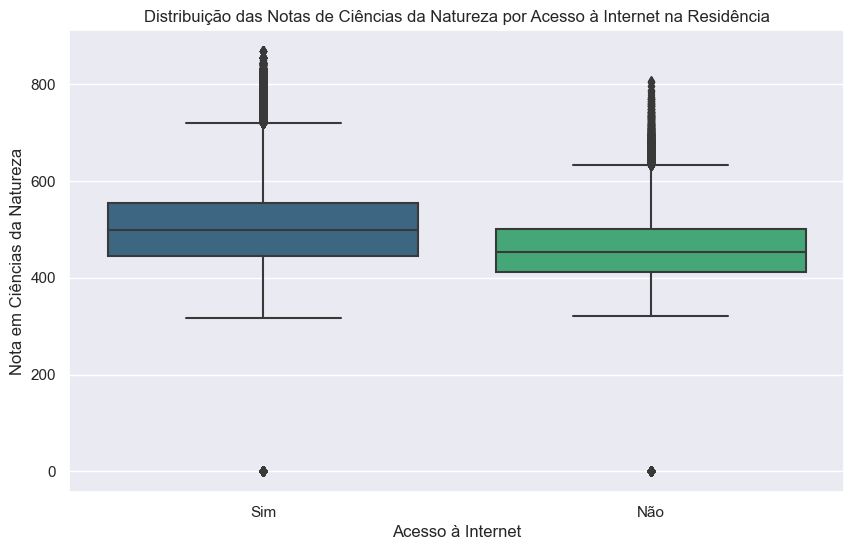

In [15]:
# Filtrar as colunas de interesse
colunas_interesse = ['NU_NOTA_CN', 'Q025']  # Q025 representa o acesso à internet na residência
df_filtrado = dados[colunas_interesse].dropna()
df_filtrado['Q025'] = df_filtrado['Q025'].map({'A': 'Não', 'B': 'Sim'})


# Gráfico de Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='Q025', y='NU_NOTA_CN', palette='viridis')
plt.title('Distribuição das Notas de Ciências da Natureza por Acesso à Internet na Residência')
plt.xlabel('Acesso à Internet')
plt.ylabel('Nota em Ciências da Natureza')
plt.show()

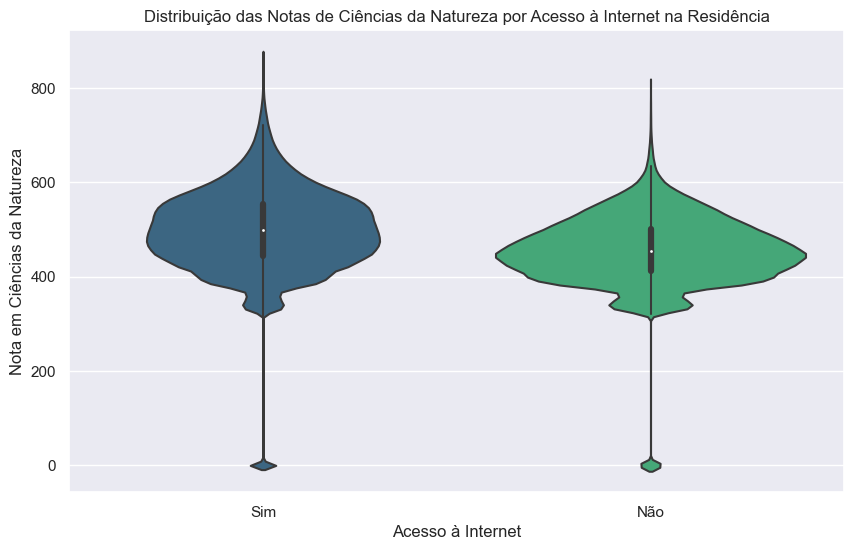

In [16]:

# Gráfico de Violino
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtrado, x='Q025', y='NU_NOTA_CN', palette='viridis')
plt.title('Distribuição das Notas de Ciências da Natureza por Acesso à Internet na Residência')
plt.xlabel('Acesso à Internet')
plt.ylabel('Nota em Ciências da Natureza')
plt.show()

**Forma e Densidade**

Para alunos com acesso à internet, a distribuição das notas é mais ampla, indicando uma maior variação. A densidade é maior na faixa de 500 a 600 pontos. Já para alunos sem acesso à internet, a distribuição também mostra variação, mas parece mais concentrada, com maior densidade em torno de 400 a 500 pontos.

**Mediana e Quartis**

As distribuições para ambos os grupos têm a mediana representada pela linha branca dentro da área mais escura. A mediana está em torno de 450 a 500 pontos para ambos os grupos. As caixas pretas representam o intervalo interquartil (IQR), indicando onde 50% dos dados centrais estão concentrados. As medianas e IQRs são semelhantes, mostrando uma distribuição similar nas notas entre os grupos.

**Conclusão**

A distribuição das notas de Ciências da Natureza do ENEM é bastante similar para alunos com e sem acesso à internet em casa. As medianas e os IQRs indicam que a variação central das notas é quase a mesma para ambos os grupos. A presença de valores extremos em ambos os grupos sugere que há alunos com notas muito altas e muito baixas, independentemente do acesso à internet.



## **MODELOS DE PREDIÇÃO COM PROCESSO DE VALIDAÇÃO** 

## MODELO DE REGRESSÃO LINEAR

**O que é Regressão Linear?**

A regressão linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou target) e uma ou mais variáveis independentes (também chamadas de variáveis preditoras ou explicativas). O objetivo é encontrar a melhor linha reta (modelo linear) que descreva a relação entre as variáveis.
A regressão linear simples pode ser representada pela equação:

$$
\ Y = \beta_0 + \beta_1 X + \epsilon \
$$

Onde:
- \( Y \) é a variável dependente.
- \( X \) é a variável independente.
- \($ \beta_0 $ \) é o intercepto da linha.
- \($ \beta_1 $\) é o coeficiente de inclinação da linha (também chamado de coeficiente de regressão).
- \($ \epsilon $\) é o termo de erro (a diferença entre o valor observado e o valor predito).

Para a regressão linear múltipla, onde existem múltiplas variáveis independentes, a equação se expande para:
$$
\ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \epsilon \
$$


A regressão linear é usada para:
- **Previsão (Predição):** Estimar os valores futuros de uma variável dependente com base nas variáveis independentes.
- **Explicação:** Compreender a força e a forma da relação entre as variáveis dependente e independente(s).
- **Tomada de Decisão:** Informar decisões com base na análise da relação entre variáveis.

## Por que Usar Regressão Linear neste Projeto?

Neste contexto, o objetivo principal é prever uma variável alvo (nota em alguma disciplina, por exemplo) com base em outras variáveis que podem influenciar seu comportamento (como renda familiar, acesso à internet, número de pessoas na residência, etc.).
## VE AUGUSTO AQUI EM CIMA

**Benefícios da Regressão Linear**

- **Simplicidade e Interpretabilidade:** A regressão linear é um modelo simples e fácil de interpretar, o que ajuda a entender a influência de cada variável preditora na variável alvo.
- **Relacionamento Linear:** Se houver uma relação linear entre as variáveis independentes e a variável dependente, a regressão linear pode fornecer previsões precisas e insights valiosos.
- **Identificação de Relações:** Ajuda a identificar quais variáveis têm maior impacto nas notas dos estudantes, permitindo um entendimento melhor sobre os fatores que influenciam o desempenho acadêmico.
- **Base para Modelos Mais Complexos:** A regressão linear pode servir como uma base inicial. Se o desempenho não for satisfatório, modelos mais complexos, como regressão polinomial, árvores de decisão ou redes neurais, podem ser considerados.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


colunas_interesse_regressao = ['NU_NOTA_CN', 'Q006', 'Q025', 'Q005']
df_filtrado = dados[colunas_interesse_regressao].dropna()

renda_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7,
    'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16
}
df_filtrado['Q006'] = df_filtrado['Q006'].map(renda_mapping)
df_filtrado['Q025'] = df_filtrado['Q025'].map({'A': 0, 'B': 1})

X = df_filtrado[['Q006', 'Q025', 'Q005']]
y = df_filtrado['NU_NOTA_CN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficientes da regressão
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
print(coeficientes)

      Coeficiente
Q006     8.417405
Q025    17.842952
Q005    -5.888396


#  Modelo Arvore de Decisões


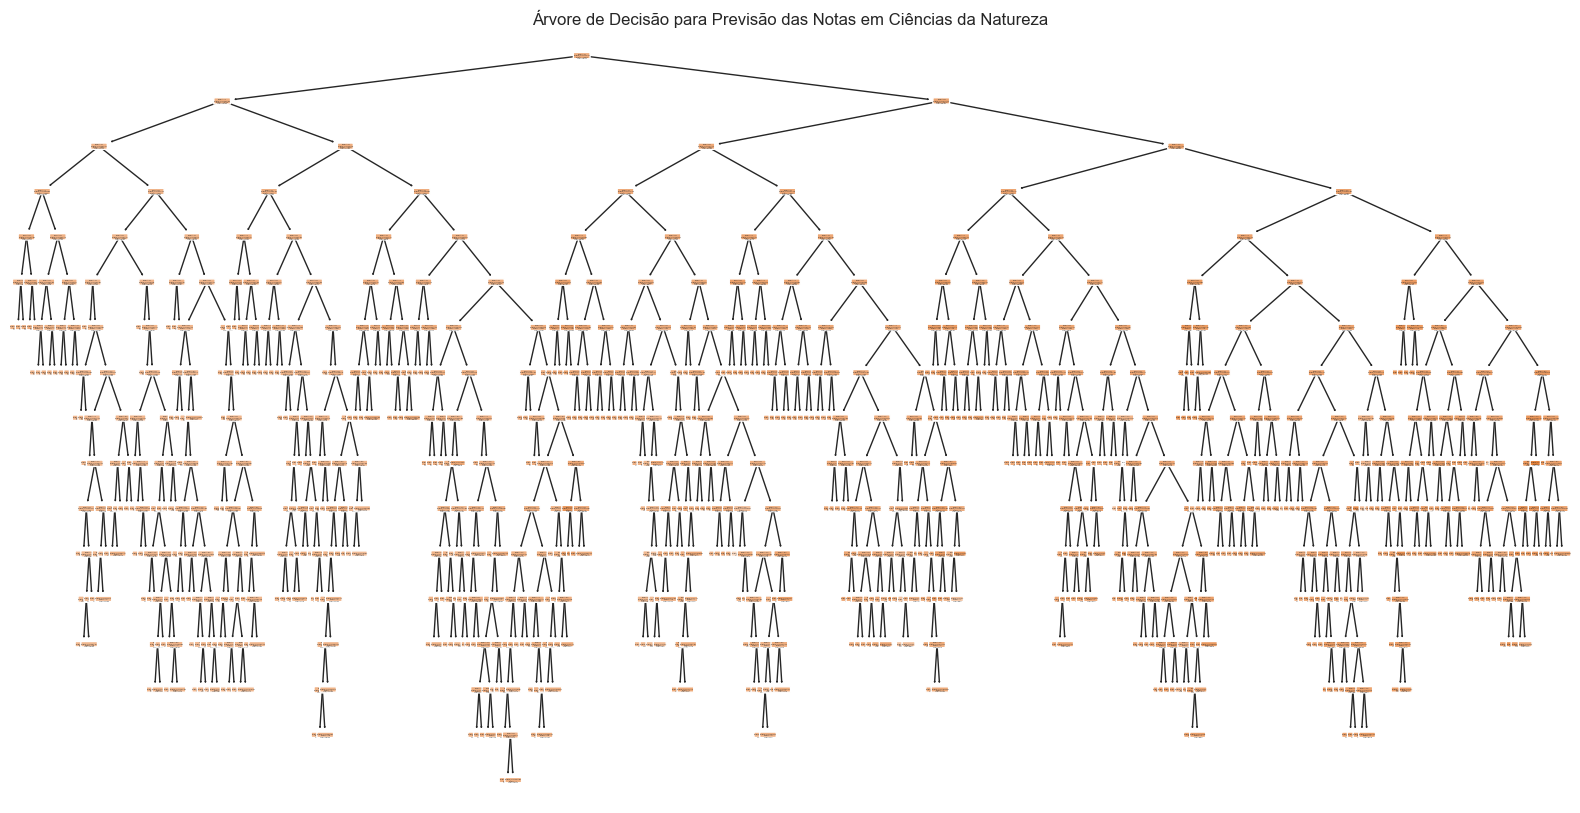

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

colunas_interesse = ['NU_NOTA_CN', 'Q006', 'Q025', 'Q005']
df_filtrado_arvore = dados[colunas_interesse].dropna()

renda_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7,
    'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16
}
df_filtrado_arvore['Q006'] = df_filtrado_arvore['Q006'].map(renda_mapping)
df_filtrado_arvore['Q025'] = df_filtrado_arvore['Q025'].map({'A': 0, 'B': 1})

X = df_filtrado_arvore[['Q006', 'Q025', 'Q005']]
y = df_filtrado_arvore['NU_NOTA_CN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de árvore de decisão
modelo_arvore = DecisionTreeRegressor(random_state=42)
modelo_arvore.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(modelo_arvore, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árvore de Decisão para Previsão das Notas em Ciências da Natureza')
plt.show()


**O que é uma Árvore de Decisão?**

Uma árvore de decisão é um modelo de aprendizado supervisionado usado para prever valores. Ela divide os dados em subconjuntos com base em condições, formando uma estrutura semelhante a uma árvore. Cada nó interno representa uma condição em uma característica (variável), cada ramo representa o resultado dessa condição e cada nó folha representa um valor de saída (previsão).

**Como Funciona?**

**1-Divisão Recursiva**

A árvore começa com todos os dados no nó raiz e divide os dados em dois ou mais subconjuntos baseados em uma condição. Este processo se repete recursivamente para cada subconjunto resultante até que as folhas da árvore contenham dados suficientemente homogêneos ou atinjam um número mínimo de dados.

**2-Critério de Divisão**

Usa critérios como a Redução de Variância (para regressão) para determinar a melhor forma de dividir os dados em cada nó.

**3-Folhas da Árvore**

No final da divisão, as folhas contêm as previsões. Em regressão, essas previsões são a média dos valores das amostras dentro de cada folha.

**Utilidade**
As árvores de decisão são usadas para:

- **Fácil Interpretação:** A estrutura em árvore torna fácil interpretar e visualizar como as decisões são tomadas.
- **Modelo Flexível:** Pode capturar relações complexas e não lineares entre as variáveis.

**Por que foi escolhida??**

No contexto, onde queremos prever as notas dos estudantes em Ciências da Natureza com base em variáveis socioeconômicas, a árvore de decisão é útil porque:

- **Visualização Clara:** Facilita a interpretação e visualização de como cada variável (como renda, acesso à internet, número de pessoas na casa) afeta as notas.
- **Relações Não Lineares:** Pode capturar relações complexas entre as variáveis que a regressão linear pode não conseguir.


## Validação dos Modelos

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE Regressão linear: {mse}')
print(f'R2 Regressão linear: {r2}')

MSE Regressão linear: 6603.84093277479
R2 Regressão linear: 0.14644038980075724


In [20]:
from sklearn.metrics import mean_squared_error, r2_score


modelo_arvore = DecisionTreeRegressor(random_state=42)
modelo_arvore.fit(X_train, y_train)

y_pred = modelo_arvore.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE Arvore: {mse}')
print(f'R2 Arvore: {r2}')

MSE Arvore: 6542.615658193886
R2 Arvore: 0.1543538786381784


**Conclusão**
O projeto teve como objetivo analisar como a condição socioeconômica influencia nas notas do Enem, e durante o processo de análise de dados escolher o melhor modelo de predição entre os dois utilizados.

Resultados dos Modelos de PrediçãoTendo como resuktados para os modelos de predição:

Regressão Linear: \
MSE (Erro Quadrático Médio): 6603.84093277479 \
R² (Coeficiente de Determinação): 0.14644038980075724


Árvore de Decisão: \
MSE (Erro Quadrático Médio): 6542.61565819386 \
R² (Coeficiente de Determinação): 0.1543587386381784 \


Análise dos Resultados \
Ao utilizar ambos modelos de predição foi possivel dizer que eles apresentam resultados similares, porém a Árvore de Decisões mostra um resultado melhor em comparação a Regressão linear. Em suma, os dois modelos apresentaram R² com valores baixos o que significanque a variação das notas do ENEM não é bem explicada apenas pelas variáveis socioeconômicas incluídas nos modelos

Melhor Modelo de Predição \
Entre os modelos testados, a Árvore de Decisão se mostrou ligeiramente mais eficaz do que a Regressão Linear, com um MSE menor e um R² maior. No entanto, os valores de R² demonstram que os modelos escolhidos podem não ter sido os melhores possíveis, ou a inclusão de mais variáveis pode ser considerada para melhorar os modelos de predição.

Impacto da Condição Socioeconômica \
Embora a condição socioeconômica tenha um impacto nas notas do ENEM, conforme indicado pelos resultados dos modelos de predição, este impacto é limitado. Isso sugere que há outros fatores significativos além da condição socioeconômica que influenciam as notas dos alunos. Fatores como qualidade do ensino, infraestrutura escolar, apoio familiar e motivação pessoal também devem ser considerados para uma análise mais abrangente.